### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Import Cleaned Data

In [4]:
df = pd.read_excel('heart_disease_cleaned.xlsx')

In [5]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,Heart_ stroke,age_group,BMI_Cat,Cigs_Range,Chol_Cat,Sys_Cat,Dia_Cat,BP_Cat,HeartRate_Cat,Glucose_Cat
0,Male,39,postgraduate,Not Somker,0,NO Meds,No,No,No,195,...,No,30-39,Over_Weight,Not_Smoker,Optimal,Normal,Normal,Normal,Normal,Normal
1,Female,46,primaryschool,Not Somker,0,NO Meds,No,No,No,250,...,No,40-49,Over_Weight,Not_Smoker,High,Elevated,Elevated,Elevated,Normal,Normal
2,Male,48,uneducated,Smoker,20,NO Meds,No,No,No,245,...,No,40-49,Over_Weight,16-20,High,Elevated,Elevated,Elevated,Normal,Normal
3,Female,61,graduate,Smoker,30,NO Meds,No,Yes,No,225,...,Yes,60-69,Over_Weight,26-30,Intermediate,Hypertension Stage 1,Hypertension Stage 1,Hypertension Stage 1,Normal,Prediabetes
4,Female,46,graduate,Smoker,23,NO Meds,No,No,No,285,...,No,40-49,Normal,21-25,High,High-Normal,Elevated,High-Normal,Normal,Normal


### Full EDA

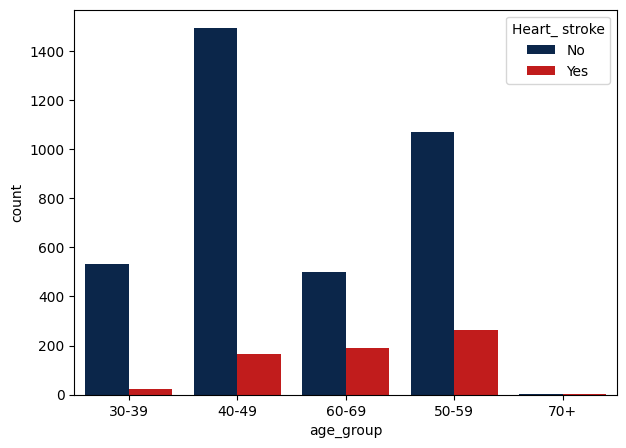

In [12]:
# age group by Heart Stroke

plt.rcParams["figure.figsize"] = (7, 5)
ax= sns.countplot(x='age_group',hue='Heart_ stroke', data=df, palette= ['#002455','#DC0000'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4238 non-null   object 
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4238 non-null   int64  
 5   BPMeds           4238 non-null   object 
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   totChol          4238 non-null   int64  
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   int64  
 14  glucose          4238 non-null   int64  
 15  Heart_ stroke    4238 non-null   object 
 16  age_group        4238 non-null   object 
 17  BMI_Cat       

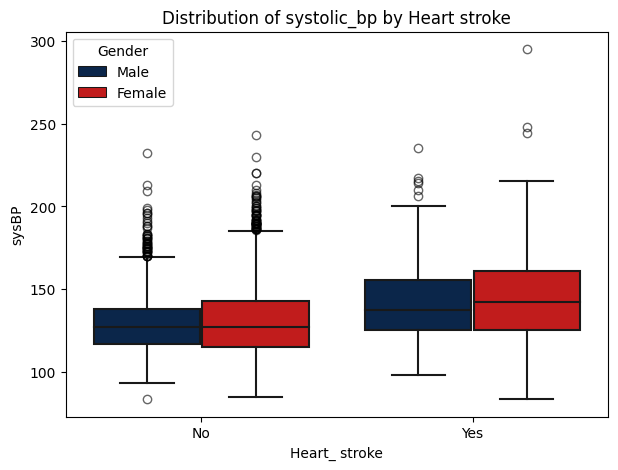

In [27]:
plt.rcParams["figure.figsize"] = (7, 5)
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6, linestyle='none', alpha=0.6)
sns.boxplot(x="Heart_ stroke", y="sysBP", data=df, hue="Gender", palette= ['#002455','#DC0000'], flierprops=flierprops)
plt.title("Distribution of systolic_bp by Heart stroke")
plt.show()

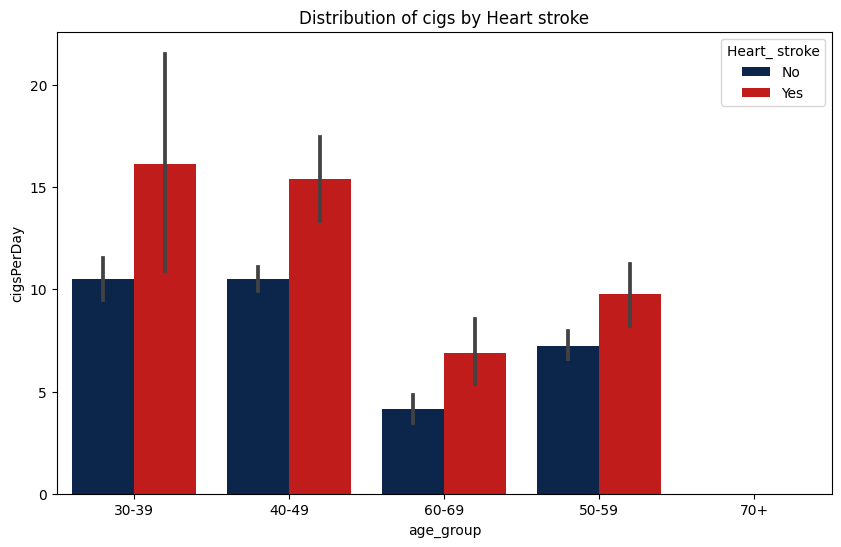

In [29]:
# Cigs_Per_Day Distribution


plt.rcParams["figure.figsize"] = (10, 6)
sns.barplot(x="age_group", y= "cigsPerDay" ,data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'])
plt.title("Distribution of cigs by Heart stroke")
plt.show()

### Create Heavy Smoker

In [30]:
df['Heavy_Smoker'] = (df['cigsPerDay'] >= 20).astype(int)

### Calculate Percentage by Age Group and Heart Stroke

In [31]:
heavy_smoker_pct = (df.groupby(['age_group', 'Heart_ stroke'])['Heavy_Smoker'].mean().reset_index(name='Heavy_Smoker_Percent'))

heavy_smoker_pct['Heavy_Smoker_Percent'] *= 100

Text(0, 0.5, 'Heavy Smokers (%)')

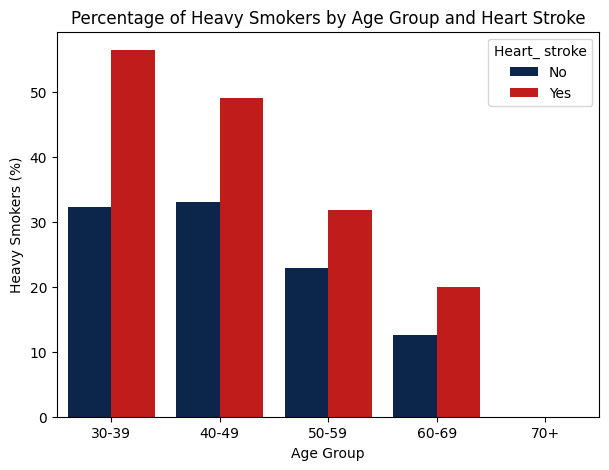

In [32]:
# Percentage of heavy smokers by age group & heart stroke

plt.figure(figsize=(7, 5))

ax = sns.barplot( x='age_group', y='Heavy_Smoker_Percent', hue='Heart_ stroke', data=heavy_smoker_pct, palette=['#002455', '#DC0000'])

plt.title("Percentage of Heavy Smokers by Age Group and Heart Stroke")
plt.xlabel("Age Group")
plt.ylabel("Heavy Smokers (%)")

### Insght : Heavy smoking is consistently more prevalent among individuals with a history of heart stroke, particularly in younger and middle age groups.

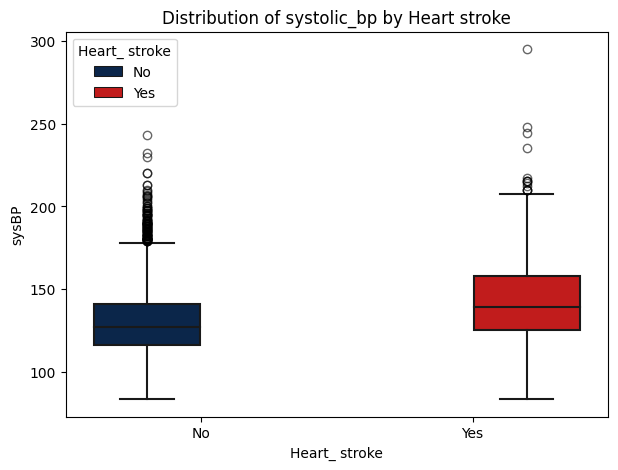

In [34]:
# Distribution of systolic_bp by Heart stroke

plt.rcParams["figure.figsize"] = (7, 5)
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6, linestyle='none', alpha=0.6)
sns.boxplot(x="Heart_ stroke", y="sysBP", data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'], flierprops=flierprops)
plt.title("Distribution of systolic_bp by Heart stroke")
plt.show()

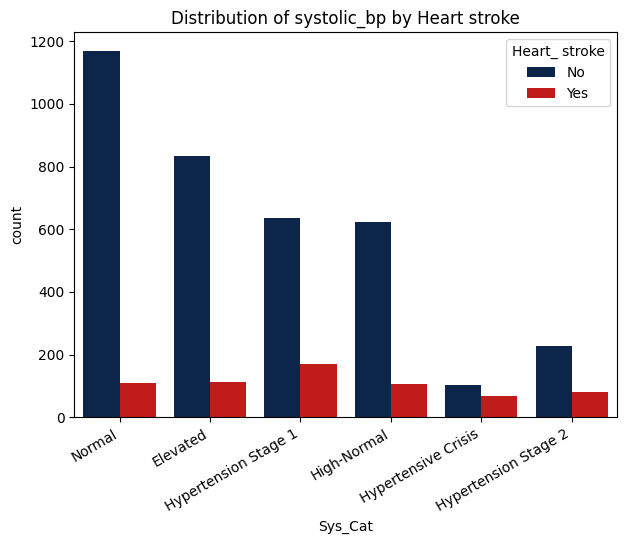

In [36]:
plt.rcParams["figure.figsize"] = (7, 5)
sns.countplot(x="Sys_Cat", data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'])
plt.xticks(rotation=30, ha='right')
plt.title("Distribution of systolic_bp by Heart stroke")
plt.show()

In [38]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,age_group,BMI_Cat,Cigs_Range,Chol_Cat,Sys_Cat,Dia_Cat,BP_Cat,HeartRate_Cat,Glucose_Cat,Heavy_Smoker
0,Male,39,postgraduate,Not Somker,0,NO Meds,No,No,No,195,...,30-39,Over_Weight,Not_Smoker,Optimal,Normal,Normal,Normal,Normal,Normal,0
1,Female,46,primaryschool,Not Somker,0,NO Meds,No,No,No,250,...,40-49,Over_Weight,Not_Smoker,High,Elevated,Elevated,Elevated,Normal,Normal,0
2,Male,48,uneducated,Smoker,20,NO Meds,No,No,No,245,...,40-49,Over_Weight,16-20,High,Elevated,Elevated,Elevated,Normal,Normal,1
3,Female,61,graduate,Smoker,30,NO Meds,No,Yes,No,225,...,60-69,Over_Weight,26-30,Intermediate,Hypertension Stage 1,Hypertension Stage 1,Hypertension Stage 1,Normal,Prediabetes,1
4,Female,46,graduate,Smoker,23,NO Meds,No,No,No,285,...,40-49,Normal,21-25,High,High-Normal,Elevated,High-Normal,Normal,Normal,1


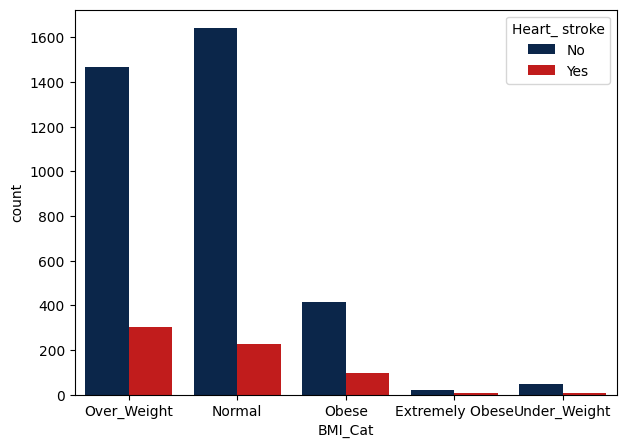

In [39]:
# BMI category By Heart Stroke

ax = sns.countplot(x='BMI_Cat', hue='Heart_ stroke',palette= ['#002455','#DC0000'] , data=df)

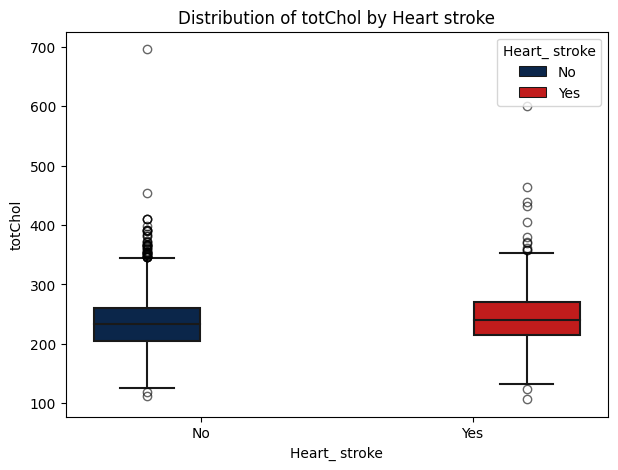

In [40]:
# Distribution of totChol by Heart stroke

plt.rcParams["figure.figsize"] = (7, 5)
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6, linestyle='none', alpha=0.6)
sns.boxplot(x="Heart_ stroke", y="totChol", data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'], flierprops= flierprops)
plt.title("Distribution of totChol by Heart stroke")
plt.show()

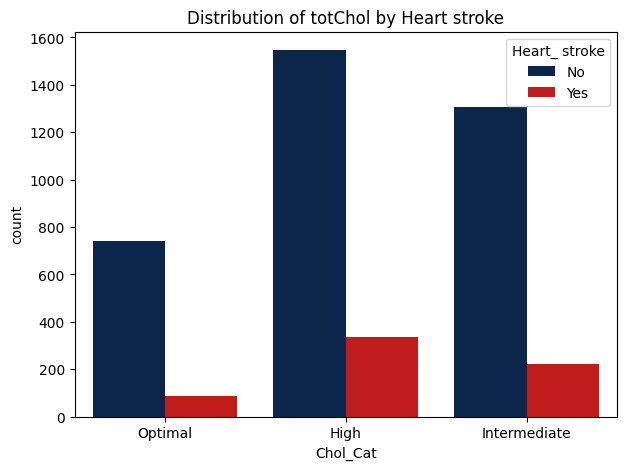

In [41]:
# Distribution of Total Cholestrol by Heart Stroke

ax = sns.countplot(x='Chol_Cat', hue='Heart_ stroke',palette= ['#002455','#DC0000'] , data=df)
plt.title("Distribution of totChol by Heart stroke")
plt.show()

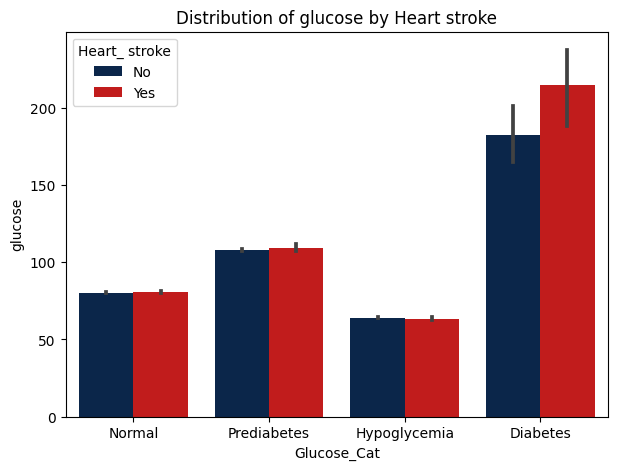

In [43]:
# Distribution of glucose by Heart stroke

plt.rcParams["figure.figsize"] = (7, 5)
sns.barplot(x="Glucose_Cat", y="glucose", data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'])
plt.title("Distribution of glucose by Heart stroke")
plt.show()

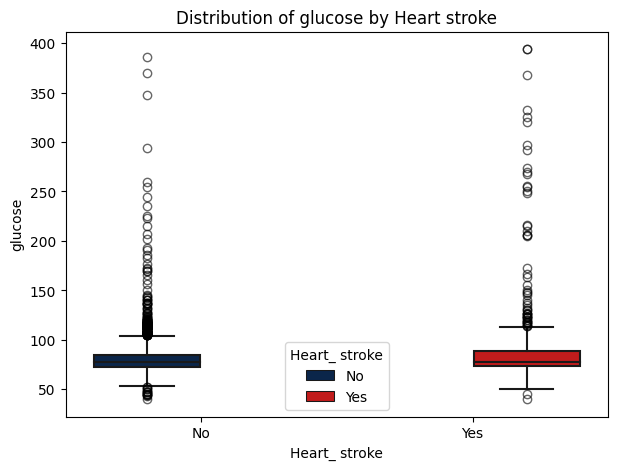

In [44]:
plt.rcParams["figure.figsize"] = (7, 5)
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6, linestyle='none', alpha=0.6)
sns.boxplot(x="Heart_ stroke", y="glucose", data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'], flierprops=flierprops)
plt.title("Distribution of glucose by Heart stroke")
plt.show()

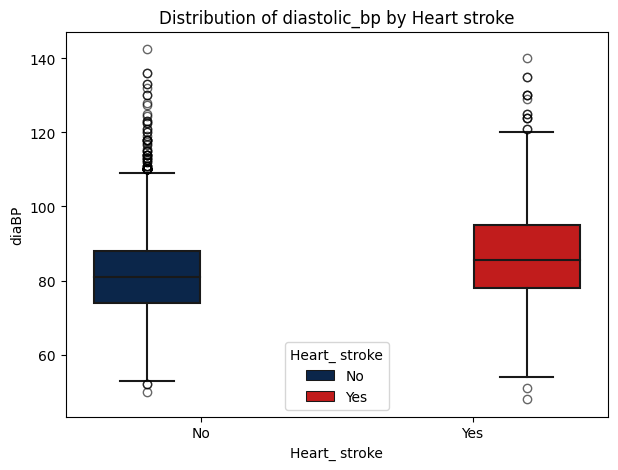

In [45]:
# Distribution of daistolic_bp by Heart stroke

plt.rcParams["figure.figsize"] = (7, 5)
flierprops = dict(marker='o', markerfacecolor='none', markeredgecolor='black', markersize=6, linestyle='none', alpha=0.6)
sns.boxplot(x="Heart_ stroke", y="diaBP", data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'], flierprops=flierprops)
plt.title("Distribution of diastolic_bp by Heart stroke")
plt.show()

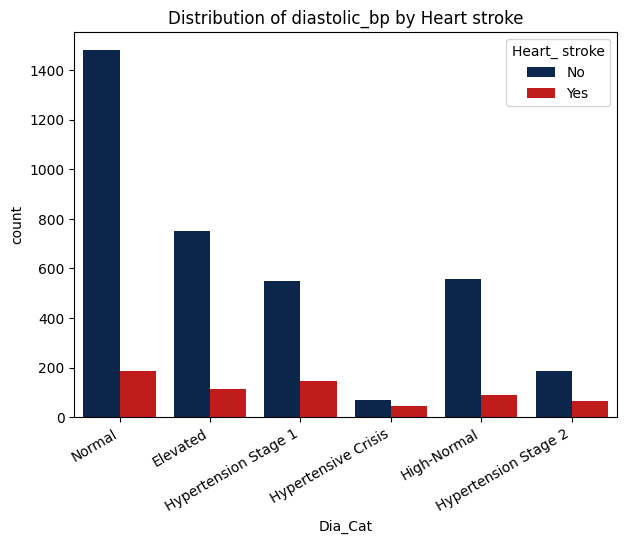

In [47]:
plt.rcParams["figure.figsize"] = (7, 5)
sns.countplot(x="Dia_Cat", data=df, hue="Heart_ stroke", palette= ['#002455','#DC0000'])
plt.xticks(rotation=30, ha='right')
plt.title("Distribution of diastolic_bp by Heart stroke")
plt.show()

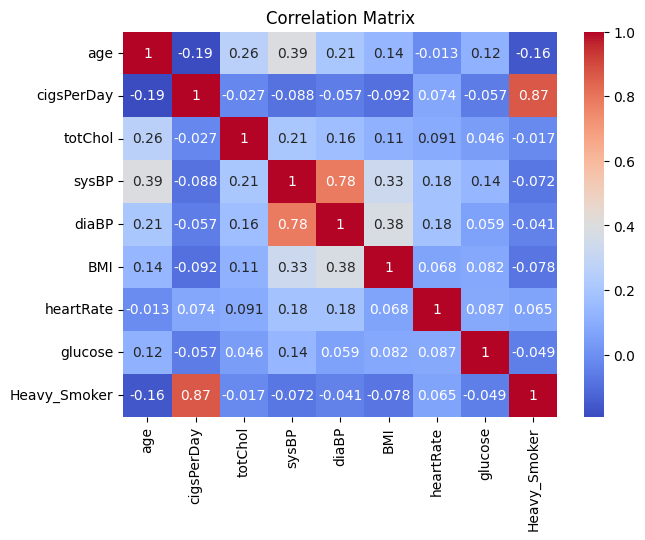

In [48]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()